<a href="https://colab.research.google.com/github/dutta-arka/Transit-Detect/blob/main/TIC_452866790_0_Vet.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install triceratops

In [ ]:
!pip install lightkurve

In [3]:
import numpy as np
import pandas as pd
import time
import lightkurve as lk
from lightkurve import TessLightCurve
import matplotlib.pyplot as plt
%matplotlib inline

import triceratops.triceratops as tr

In [31]:
import pandas as pd
import matplotlib.pyplot as plt

# Read the data from the CSV file
# .csv file is directly from SHERLOCKPIPE out product
data = pd.read_csv("lc_0.csv")

# Extract the values from each column
x = data.iloc[:, 0]
y = data.iloc[:, 1]
error = data.iloc[:, 2]

# LightCurve object
lc = lk.LightCurve(time=x, flux=y, flux_err=error).bin(time_bin_size=0.012)
lc = lc.remove_nans()

# Perform phase folding around the given epoch
tic_id = 452866790
period = 1.1980085457523  # Orbital period in days
epoch = 1492.20260245027
folded_lc = lc.fold(period=period, epoch_time=epoch)
folded_lc = folded_lc[folded_lc.time < 0.12]
folded_lc = folded_lc[folded_lc.time > -0.12]

# Plot the data with error bars
# plt.errorbar(x, y, fmt='o', markersize=3, capsize=2)

# # Plot a dotted line connecting the y-values
# plt.plot(x, y, linestyle=':', color='black')

# plt.xlabel('X')
# plt.ylabel('Y')
# plt.title('Folded light curve')
# plt.gcf().set_size_inches(15, 8)
# plt.grid(True)
# plt.show()

# Create a DataFrame with the required columns
folded_data = pd.DataFrame({
    'Time': folded_lc.time.value,  # Convert time to array
    'Flux': folded_lc.flux.value,  # Convert flux to array
    'Flux Error': folded_lc.flux_err.value  # Convert flux error to array
})

# Save the phase-folded light curve to a CSV file without column headers
output_filename = f"TIC_{tic_id}_all_sector_lightcurve.csv"
folded_data.to_csv(output_filename, index=False, header=False)

print(f"Phase-folded light curve saved to: {output_filename}")

Phase-folded light curve saved to: TIC_452866790_all_sector_lightcurve.csv


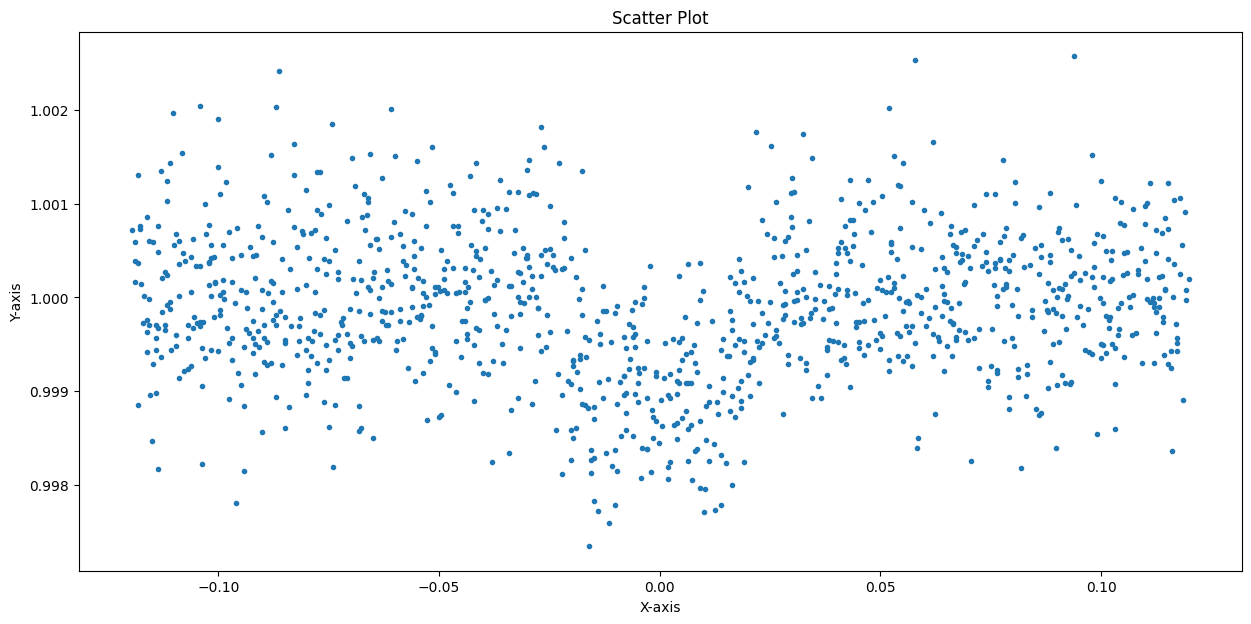

In [32]:
import pandas as pd
import matplotlib.pyplot as plt

# Read the CSV file
data = pd.read_csv(f'TIC_{tic_id}_all_sector_lightcurve.csv')

# Extract the x and y values from the dataset
x = data.iloc[:, 0]  # Assuming the first column is the x-axis
y = data.iloc[:, 1]  # Assuming the second column is the y-axis

# Set the figure size
plt.figure(figsize=(15, 7))

# Create a scatter plot
plt.scatter(x, y, marker='.')

# Add labels and title
plt.xlabel('X-axis')
plt.ylabel('Y-axis')
plt.title('Scatter Plot')

# Show the plot
plt.show()

In [20]:
ID = tic_id
sectors = np.array([7, 34, 61])
target = tr.target(ID=ID, sectors=sectors, search_radius=7) # target radius shorted

<ipython-input-21-b8ebf7f09c11>:8: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  apertures = np.array([ap_7, ap_34, ap_61])


Sector 7


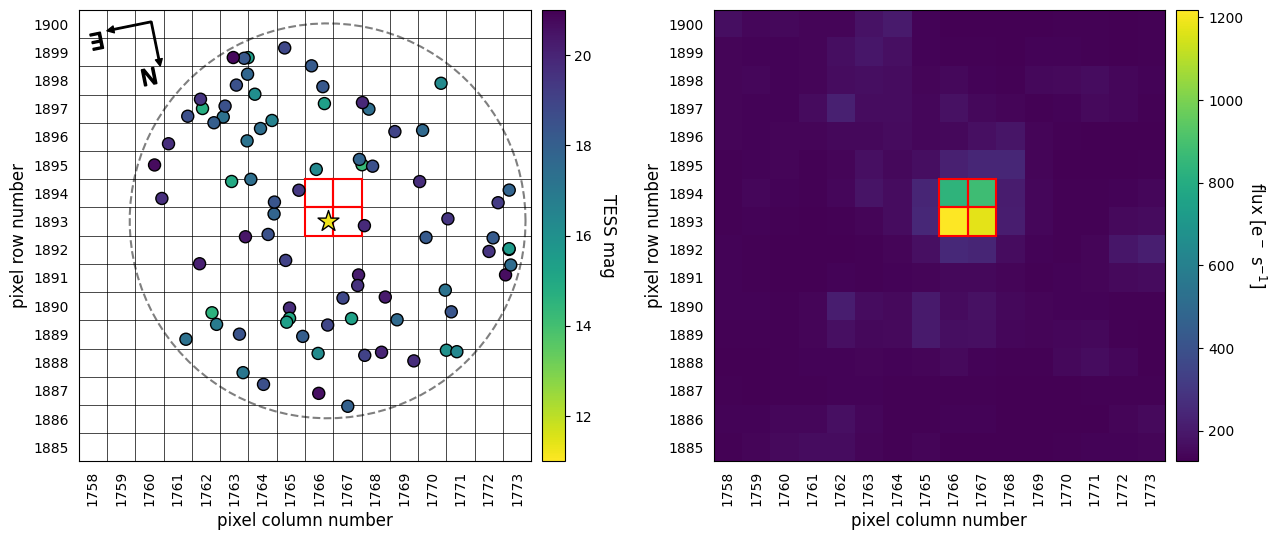

Sector 34


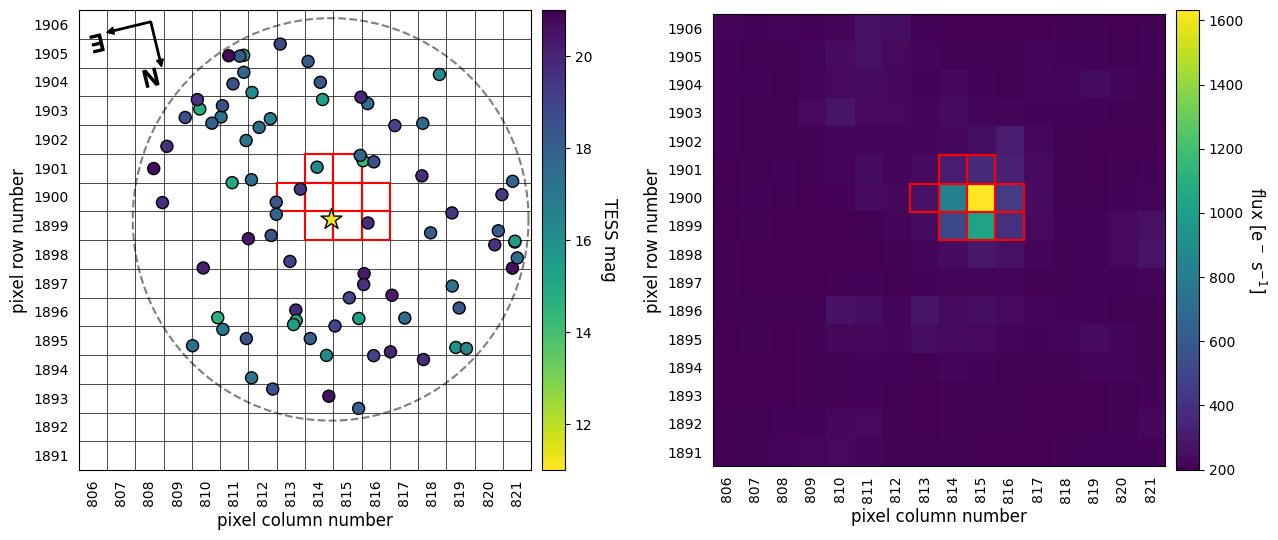

Sector 61


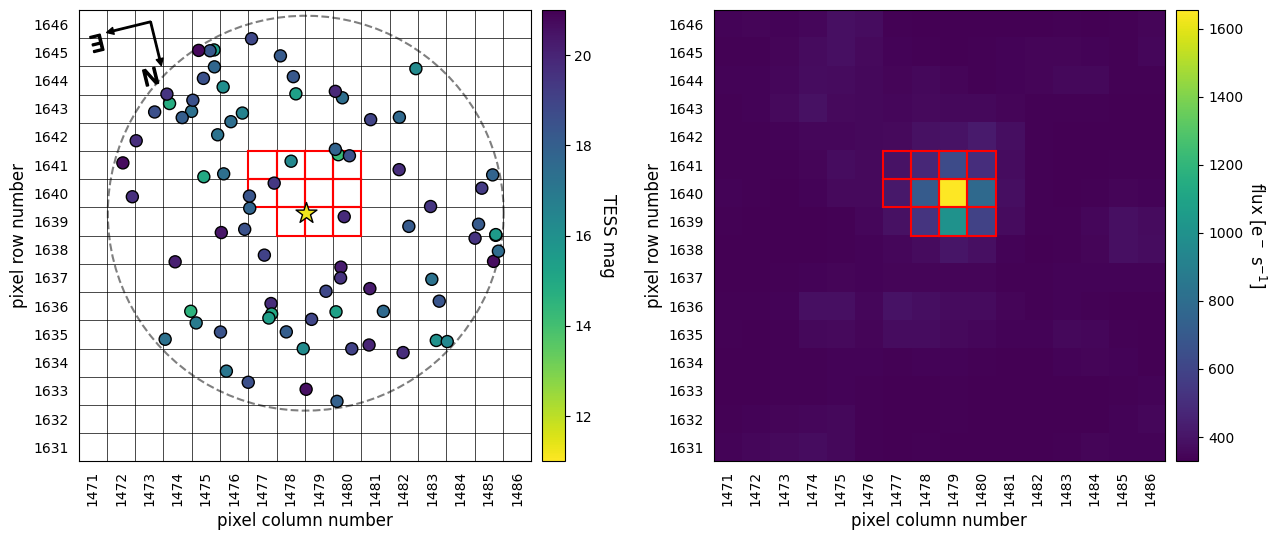

,ID,Tmag,Jmag,Hmag,Kmag,ra,dec,mass,rad,Teff,plx,sep (arcsec),PA (E of N)
0,452866790,11.1972,9.627,9.063,8.829,120.595345,3.338803,0.339440,0.354529,3329.0,36.515000,0.000,0.000
1,804130389,19.8270,NaN,NaN,NaN,120.588040,3.341307,NaN,NaN,NaN,1.038520,27.757,288.945
2,804130381,19.3715,NaN,NaN,NaN,120.599939,3.331369,NaN,NaN,NaN,1.619840,31.447,148.334
3,452866793,16.3309,15.651,15.350,15.200,120.595538,3.327829,1.030000,0.985430,5740.0,0.334380,39.514,178.998
4,452866791,17.7620,16.060,15.354,15.185,120.605974,3.335182,NaN,NaN,NaN,NaN,40.362,108.844
...,...,...,...,...,...,...,...,...,...,...,...,...,...
75,452866780,17.3223,15.767,15.125,14.941,120.629103,3.357153,0.318349,0.336281,3361.0,2.335820,138.140,61.430
76,804130437,20.6663,NaN,NaN,NaN,120.561293,3.357171,NaN,NaN,NaN,NaN,139.100,298.385
77,804130465,17.9264,NaN,NaN,NaN,120.598870,3.377519,NaN,NaN,4605.0,0.592336,139.952,5.192
78,452866782,17.5065,16.352,15.625,15.337,120.559826,3.355376,0.630000,0.721831,4012.0,0.647245,140.906,295.051


In [21]:
ap_7 = np.array([[1766.0, 1893.0], [1766.0, 1894.0], [1767.0, 1893.0], [1767.0, 1894.0]])
ap_34 = np.array([[813.0, 1900.0], [814.0, 1899.0], [814.0, 1900.0], [814.0, 1901.0], [815.0,
        1899.0], [815.0, 1900.0], [815.0, 1901.0], [816.0, 1899.0], [816.0, 1900.0]])
ap_61 = np.array([[1477.0, 1640.0], [1477.0, 1641.0], [1478.0, 1639.0], [1478.0, 1640.0], [
        1478.0, 1641.0], [1479.0, 1639.0], [1479.0, 1640.0], [1479.0, 1641.0], [1480.0,
        1639.0], [1480.0, 1640.0], [1480.0, 1641.0]])

apertures = np.array([ap_7, ap_34, ap_61])
for i,(sector,aperture) in enumerate(zip(sectors,apertures)):
    print("Sector", sector)
    target.plot_field(sector=sector, ap_pixels=aperture)

target.stars

In [30]:
target.calc_depths(tdepth=0.743, all_ap_pixels=apertures)
target.stars

,ID,Tmag,Jmag,Hmag,Kmag,ra,dec,mass,rad,Teff,plx,sep (arcsec),PA (E of N),fluxratio,tdepth
0,452866790,11.1972,9.627,9.063,8.829,120.595345,3.338803,0.339440,0.354529,3329.0,36.515000,0.000,0.000,9.677014e-01,0.767799
1,804130389,19.8270,NaN,NaN,NaN,120.588040,3.341307,NaN,NaN,NaN,1.038520,27.757,288.945,2.444366e-04,0.000000
2,804130381,19.3715,NaN,NaN,NaN,120.599939,3.331369,NaN,NaN,NaN,1.619840,31.447,148.334,3.781375e-04,0.000000
3,452866793,16.3309,15.651,15.350,15.200,120.595538,3.327829,1.030000,0.985430,5740.0,0.334380,39.514,178.998,5.519658e-03,0.000000
4,452866791,17.7620,16.060,15.354,15.185,120.605974,3.335182,NaN,NaN,NaN,NaN,40.362,108.844,5.806992e-04,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
75,452866780,17.3223,15.767,15.125,14.941,120.629103,3.357153,0.318349,0.336281,3361.0,2.335820,138.140,61.430,1.277813e-16,0.000000
76,804130437,20.6663,NaN,NaN,NaN,120.561293,3.357171,NaN,NaN,NaN,NaN,139.100,298.385,2.574837e-14,0.000000
77,804130465,17.9264,NaN,NaN,NaN,120.598870,3.377519,NaN,NaN,4605.0,0.592336,139.952,5.192,4.321253e-18,0.000000
78,452866782,17.5065,16.352,15.625,15.337,120.559826,3.355376,0.630000,0.721831,4012.0,0.647245,140.906,295.051,2.481837e-13,0.000000


In [ ]:
%%time

# read in the light curve
lc = pd.read_csv(f"TIC_{ID}_all_sector_lightcurve.csv", header=None)
time, flux, flux_err = lc[0].values, lc[1].values, lc[2].values
P_orb = period

lc_binsize = (time.max()-time.min())/100
lc = TessLightCurve(time=time, flux=flux, flux_err=flux_err).bin(time_bin_size=lc_binsize)

target.calc_probs(time=lc.time.value, flux_0=lc.flux.value, flux_err_0=np.mean(lc.flux_err.value), P_orb=P_orb,
                  parallel=True)

In [24]:
df_results = target.probs
print("FPP =", np.round(target.FPP, 8))
print("NFPP =", np.round(target.NFPP, 8))
df_results

FPP = 0.02596591
NFPP = 0.0


,ID,scenario,M_s,R_s,P_orb,inc,b,ecc,w,R_p,M_EB,R_EB,prob
0,452866790,TP,0.339440,0.354529,1.198009,86.566627,0.323512,0.525703,151.459904,1.269545,0.000000,0.000000,8.315723e-01
1,452866790,EB,0.339440,0.354529,1.198009,79.669659,1.866713,0.132255,44.978914,0.000000,0.308408,0.325009,1.763678e-53
2,452866790,EBx2P,0.339440,0.354529,2.396017,86.660924,0.369980,0.799198,175.816968,0.000000,0.331527,0.344525,1.360529e-10
3,452866790,PTP,0.339440,0.354529,1.198009,86.666075,0.198187,0.656148,121.285007,1.478349,0.000000,0.000000,1.020218e-01
4,452866790,PEB,0.339440,0.354529,1.198009,80.125015,1.896236,0.070381,40.623768,0.000000,0.314383,0.330071,4.460369e-55
5,452866790,PEBx2P,0.339440,0.354529,2.396017,86.710537,0.332460,0.817461,175.563608,0.000000,0.327384,0.341041,2.157520e-08
6,452866790,STP,0.251727,0.276193,1.198009,87.882465,0.260348,0.436419,145.560093,1.555524,0.000000,0.000000,2.447166e-02
7,452866790,SEB,0.208528,0.237745,1.198009,82.160678,1.738843,0.144120,65.183614,0.000000,0.192341,0.222989,5.586134e-53
8,452866790,SEBx2P,0.158458,0.190390,2.396017,87.567698,0.642559,0.656504,178.839832,0.000000,0.157733,0.189648,5.078388e-22
9,452866790,DTP,0.339440,0.354529,1.198009,86.752487,0.366584,0.403984,149.047211,1.209991,0.000000,0.000000,4.044002e-02


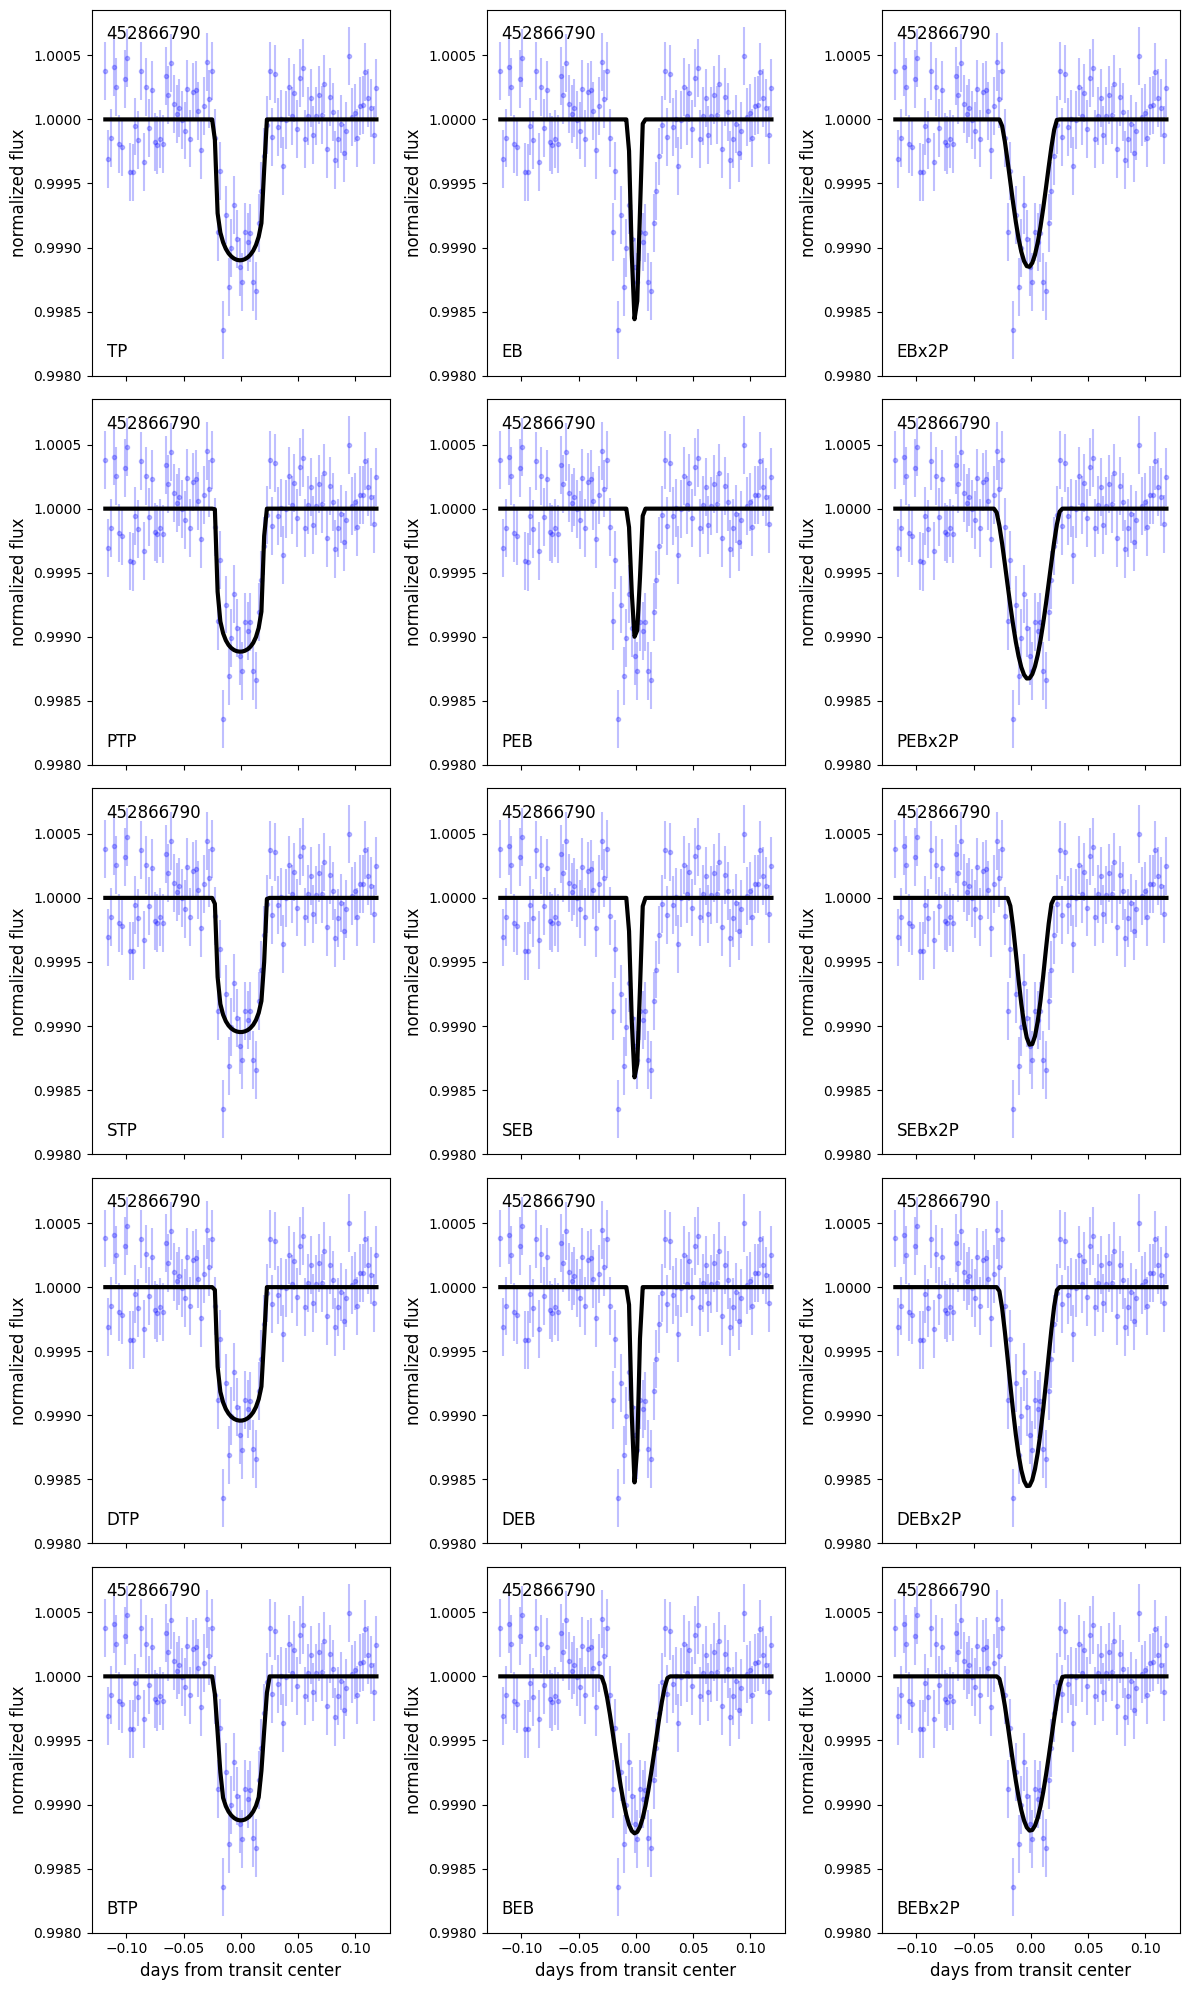

In [25]:
target.plot_fits(time=lc.time.value, flux_0=lc.flux.value, flux_err_0=np.mean(lc.flux_err.value))

In [26]:
%%time

FPPs = np.zeros(20)
NFPPs = np.zeros(20)
for i in range(20):
    target.calc_probs(time=lc.time.value,
                      flux_0=lc.flux.value,
                      flux_err_0=np.mean(lc.flux_err.value),
                      P_orb=P_orb,
                      parallel=True,
                      verbose=0)
    FPPs[i] = target.FPP
    NFPPs[i] = target.NFPP

meanFPP = np.mean(FPPs)
stdvFPP = np.std(FPPs)
print("FPP =", meanFPP, "+/-", stdvFPP)

meanNFPP = np.mean(NFPPs)
stdvNFPP = np.std(NFPPs)
print("NFPP =", meanNFPP, "+/-", stdvNFPP)

FPP = 0.02822496906687883 +/- 0.002206168188031608
NFPP = 0.0 +/- 0.0
CPU times: user 52min 40s, sys: 56.9 s, total: 53min 37s
Wall time: 36min 30s


Our final conclusion about this specified planet of TIC 452866790 is that it is most likely a planet (according to the range of FPP and NFPP set by TRICERATOPS).